In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import signal
import os

In [2]:
path = '../03 CT Scan Images-002/'

In [3]:
#Calc all porosities
for CT_scan in os.listdir(path):
    if 'mat' in CT_scan:
        rawMatData = loadmat(os.path.join(path, CT_scan))
        bwImage = rawMatData["bwImage"]
        ctImage = rawMatData["ctImage"]

        porosity = np.sum(bwImage==0)/np.prod(bwImage.shape)
        print("Image: %s with porosity: %.4f "%(CT_scan, porosity))

Image: Beta_1_0.2.mat with porosity: 0.3376 
Image: Beta_1_0.5.mat with porosity: 0.3353 
Image: Beta_1_0.mat with porosity: 0.3672 
Image: Beta_2_0.2.mat with porosity: 0.3476 
Image: Beta_2_0.5.mat with porosity: 0.3472 
Image: Beta_2_0.mat with porosity: 0.3841 
Image: Mono_1_0.2.mat with porosity: 0.3387 
Image: Mono_1_0.5.mat with porosity: 0.3359 
Image: Mono_1_0.mat with porosity: 0.3730 
Image: Mono_2_0.2.mat with porosity: 0.3483 
Image: Mono_2_0.5.mat with porosity: 0.3420 
Image: Mono_2_0.mat with porosity: 0.3849 
Image: Mono_3_0.2.mat with porosity: 0.3495 
Image: Mono_3_0.5.mat with porosity: 0.3557 
Image: Mono_3_0.mat with porosity: 0.3887 
Image: Normal_1_0.2.mat with porosity: 0.3450 
Image: Normal_1_0.5.mat with porosity: 0.3468 
Image: Normal_1_0.mat with porosity: 0.3799 
Image: Normal_2_0.2.mat with porosity: 0.3369 
Image: Normal_2_0.5.mat with porosity: 0.3408 
Image: Normal_2_0.mat with porosity: 0.3709 
Image: Normal_3_0.2.mat with porosity: 0.3386 
Image: Nor

## Simple threshholding by 0.5

In [27]:
real_poro = []
new_poro = []
simpl_poro = []

for CT_scan in os.listdir(path):
    if 'mat' in CT_scan:
        rawMatData = loadmat(os.path.join(path, CT_scan))
        bwImage = rawMatData["bwImage"]
        ctImage = rawMatData["ctImage"]
        
        true_porosity = np.sum(bwImage==0)/np.prod(bwImage.shape)
        
#         ct_img_val = ctImage.flatten()
#         thresh = (np.bincount(ct_img_val[ct_img_val >= 128]).argmax() - np.bincount(ct_img_val[ct_img_val < 128]).argmax())/2
        
#         new_bwImage = np.zeros_like(ctImage)
        simplest_bwImage = np.zeros_like(ctImage)
        
#         new_bwImage = np.where(ctImage > thresh, new_bwImage+1, new_bwImage)
#         new_porosity = np.sum(new_bwImage==0)/np.prod(new_bwImage.shape)
        
        simplest_bwImage = np.where(ctImage/255.0 > 0.5, simplest_bwImage+1, simplest_bwImage)
        simplest_porosity = np.sum(simplest_bwImage==0)/np.prod(simplest_bwImage.shape)
        
        print("Image: %s with real porosity: %.4f, with simple threshold porosity: %.4f"%(
            CT_scan, true_porosity, simplest_porosity))
        print("Errors: with  0.5 threshold: %.3f "%(np.abs(true_porosity - simplest_porosity)/true_porosity))
        print('---------------------------------------------------------------------------------')

Image: Beta_1_0.2.mat with real porosity: 0.3376, with simple threshold porosity: 0.3226
Errors: with  0.5 threshold: 0.045 
---------------------------------------------------------------------------------
Image: Beta_1_0.5.mat with real porosity: 0.3353, with simple threshold porosity: 0.3184
Errors: with  0.5 threshold: 0.051 
---------------------------------------------------------------------------------
Image: Beta_1_0.mat with real porosity: 0.3672, with simple threshold porosity: 0.3646
Errors: with  0.5 threshold: 0.007 
---------------------------------------------------------------------------------
Image: Beta_2_0.2.mat with real porosity: 0.3476, with simple threshold porosity: 0.3321
Errors: with  0.5 threshold: 0.045 
---------------------------------------------------------------------------------
Image: Beta_2_0.5.mat with real porosity: 0.3472, with simple threshold porosity: 0.3487
Errors: with  0.5 threshold: 0.004 
-------------------------------------------------

## Threshholding by taking middle between peaks

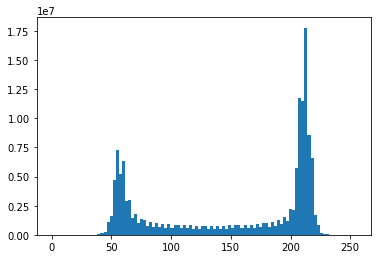

In [29]:
img_val = ctImage.flatten()
plt.hist(img_val, bins = 100)
plt.show()

In [34]:
for CT_scan in os.listdir(path):
    if 'mat' in CT_scan:
        rawMatData = loadmat(os.path.join(path, CT_scan))
        bwImage = rawMatData["bwImage"]
        ctImage = rawMatData["ctImage"]
        
        true_porosity = np.sum(bwImage==0)/np.prod(bwImage.shape)
        
        ct_img_val = ctImage.flatten()
        thresh = np.bincount(ct_img_val[ct_img_val < 128]).argmax() + (
            np.bincount(ct_img_val[ct_img_val >= 128]).argmax() - np.bincount(ct_img_val[ct_img_val < 128]).argmax())/2
        
        new_bwImage = np.zeros_like(ctImage)

        new_bwImage = np.where(ctImage > thresh, new_bwImage+1, new_bwImage)
        new_porosity = np.sum(new_bwImage==0)/np.prod(new_bwImage.shape)

        print("Image: %s with real porosity: %.4f, with simple threshold porosity: %.4f, threshhold: %.3f"%(
            CT_scan, true_porosity, new_porosity, thresh/255.0))
        print("Errors: with  new threshold: %.3f "%(np.abs(true_porosity - new_porosity)/true_porosity))
        print('---------------------------------------------------------------------------------')

Image: Beta_1_0.2.mat with real porosity: 0.3376, with simple threshold porosity: 0.3357, threshhold: 0.522
Errors: with  new threshold: 0.006 
---------------------------------------------------------------------------------
Image: Beta_1_0.5.mat with real porosity: 0.3353, with simple threshold porosity: 0.3304, threshhold: 0.520
Errors: with  new threshold: 0.015 
---------------------------------------------------------------------------------
Image: Beta_1_0.mat with real porosity: 0.3672, with simple threshold porosity: 0.3665, threshhold: 0.504
Errors: with  new threshold: 0.002 
---------------------------------------------------------------------------------
Image: Beta_2_0.2.mat with real porosity: 0.3476, with simple threshold porosity: 0.3470, threshhold: 0.533
Errors: with  new threshold: 0.002 
---------------------------------------------------------------------------------
Image: Beta_2_0.5.mat with real porosity: 0.3472, with simple threshold porosity: 0.3452, threshho